<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h2>Ingeniero Renzo Bolivar - Docente DAIE</h2> </center> 

<center> <h1>Curso : Computación 2</h1> </center> 

<center> <h2>Alumno : Willian Canazas Rosas</h2> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<center> <h1>SERIES TEMPORALES</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

# Descripción:

<div class="alert alert-info">

En este notebook se explicará una introducción a análisis exploratorio de datos con **series temporales** y visualización de datos en **Pandas**
    
</div>



# Objetivos:

1. Definir que es una **Serie Temporal**
2. Importando archivos ***csv*** con una **Serie Temporal** limpieza de datos inicial en **Pandas.**
3. Visualizar los datos de una **Serie Temporal**

algunas funciones importantes de pandas.

[1. Definición de una Serie Temporal](#1.-Definición-de-una-Serie-Temporal)<br>
[2. Limpieza de Datos de una Serie Temporal](#2.-Limpieza-de-Datos-de-una-Serie-Temporal)<br>
[3. Visualización de Datos una Serie Temporal](#3.-Visualización-de-Datos-una-Serie-Temporal)<br>


[EJERCICIOS](#EJERCICIOS)<br>
[BIBLIOGRAFÍA](#BIBLIOGRAFÍA)<br>

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

## <font color=#33A5FF>****1. Definición de una Serie Temporal****<tfont>

<div class="well">
<strong>Serie Temporal :</strong>  es una sucesión de datos medidos en determinados momentos y ordenados cronológicamente.
    
<strong>Serie Temporal :</strong>es una sucesión de observaciones de una variable tomadas en varios instantes de tiempo. Nos interesa estudiar los cambios en esa variable con respeto al <strong>tiempo</strong>. <strong>Predecir sus valores futuros</strong>.
    
    
</div>

![Series Temporales@2x](https://user-images.githubusercontent.com/19308295/120925798-e04a5680-c69f-11eb-8b33-0291e5d2a02b.png)

<div class="alert alert-info">

**Ejemplos :**
    
**Economía**: producto interior bruto anual, tasa de inflacíon, tasa de desempleo, etc.

**Demografía**: nacimientos anuales, tasa de dependencia, etc.

**Meteorología**: temperaturas máximas, medias o mínimas, precipitaciones diarias, etc.

**Medio Ambiente**: concentración media mensual de nitratos en agua, alcalinidad media anual del suelo, emisiones anuales de CO2, contaminación del aire, etc.
    
</div>



### Representación gráfica de una serie temporal

![Covid Chile](https://user-images.githubusercontent.com/19308295/120926013-b7769100-c6a0-11eb-91dc-54ceb72979f3.png)

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****2.Limpieza de Datos de una Serie Temporal****<tfont>

### Librerías

In [1]:
#importar librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Cargar los datos, DIOXIDO DE NITROGENO NO2     
#. parse_dates. convierte los datos de tiempo en formato TIMESTAMP para utilizar fechas
aq = pd.read_csv("air_quality_no2.csv",index_col=0, parse_dates=True)

In [3]:
#Ver los 5 primeros datos
aq.head()

,station_1,station_2,station_3
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [4]:
#Ver los 5 ultimos datos
aq.tail()

,station_1,station_2,station_3
datetime,,,
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN
2019-06-21 01:00:00,NaN,21.8,NaN
2019-06-21 02:00:00,NaN,20.0,NaN


In [5]:
#Explorar los datos
aq.describe().T

,count,mean,std,min,25%,50%,75%,max
station_1,95.0,25.778947,12.682019,7.5,16.75,23.00,34.500,74.5
station_2,1004.0,27.740538,15.285746,0.0,16.50,24.15,35.925,97.0
station_3,969.0,24.777090,11.214377,0.0,19.00,25.00,31.000,97.0


In [6]:
#Datos
aq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station_1  95 non-null     float64
 1   station_2  1004 non-null   float64
 2   station_3  969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB


In [7]:
aq.shape

(1035, 3)

### 1.1. VALORES MEDIOS

In [8]:
#Pasar datos horarios a datos medios diarios 
aq.resample("d").mean()

,station_1,station_2,station_3
datetime,,,
2019-05-07,47.750000,33.900000,22.100000
2019-05-08,21.750000,25.529167,26.478261
2019-05-09,20.250000,27.837500,43.173913
2019-05-10,11.000000,32.950000,34.625000
2019-05-11,23.750000,26.804762,30.842105
2019-05-12,18.750000,17.070833,28.333333
2019-05-13,14.500000,22.866667,28.625000
2019-05-14,13.000000,22.591667,28.416667
2019-05-15,24.000000,19.975000,30.956522


In [9]:
#Pasar datos horarios a datos medios mensuales
aq.resample("m").mean()

,station_1,station_2,station_3
datetime,,,
2019-05-31,24.344156,27.749322,28.162116
2019-06-30,31.916667,27.728019,19.597911


In [10]:
#Pasar de datos horarios a datos medios anuales
aq.resample("y").mean()

,station_1,station_2,station_3
datetime,,,
2019-12-31,25.778947,27.740538,24.77709


### 1.2. VALORES MAXIMOS

In [11]:
# Pasar datos horarios a datos máximos diarios

aq.resample("d").max().head()

,station_1,station_2,station_3
datetime,,,
2019-05-07,50.5,77.7,32.0
2019-05-08,23.0,48.9,40.0
2019-05-09,20.5,50.7,97.0
2019-05-10,11.5,60.7,59.0
2019-05-11,26.5,36.8,37.0


In [12]:
#Pasar datos horarios a datos máximos mensuales

aq.resample("m").max().head()

,station_1,station_2,station_3
datetime,,,
2019-05-31,74.5,97.0,97.0
2019-06-30,52.5,84.7,52.0


In [13]:
# Pasar de datos horarios a datos máximos anuales
aq.resample("y").max().head()


,station_1,station_2,station_3
datetime,,,
2019-12-31,74.5,97.0,97.0


### 1.3. VALORES MÍNIMOS

In [14]:

#Pasar datos horarios a datos mínimos diarios
aq.resample("d").min().head()

,station_1,station_2,station_3
datetime,,,
2019-05-07,45.0,10.6,16.0
2019-05-08,20.5,13.5,19.0
2019-05-09,20.0,10.0,25.0
2019-05-10,10.5,14.1,24.0
2019-05-11,21.0,14.9,26.0


In [15]:
#Pasar datos horarios a datos mínimos mensuales
aq.resample("m").min().head()

,station_1,station_2,station_3
datetime,,,
2019-05-31,7.5,0.0,0.0
2019-06-30,7.5,0.0,0.0


In [16]:
#Pasar datos horarios a datos mínimos anuales
aq.resample("y").min().head()

,station_1,station_2,station_3
datetime,,,
2019-12-31,7.5,0.0,0.0


### 1.4. Reemplazar valores NaN

In [17]:
#Dataframe original
aq

,station_1,station_2,station_3
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


In [18]:
#Rellena valores NaN utilizando un método de interpolación
aq.interpolate(method="time")

,station_1,station_2,station_3
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.500000,25.0,19.0
2019-05-07 04:00:00,45.000000,27.7,19.0
2019-05-07 05:00:00,44.043478,50.4,16.0
2019-05-07 06:00:00,43.086957,61.9,21.0
...,...,...,...
2019-06-20 22:00:00,41.000000,21.4,11.0
2019-06-20 23:00:00,41.000000,24.9,11.0
2019-06-21 00:00:00,41.000000,26.5,11.0


![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****3. Visualización de Datos una Serie Temporal****<tfont>

![plot](https://user-images.githubusercontent.com/19308295/120927485-90bb5900-c6a6-11eb-8c4e-4cdac5802723.png)


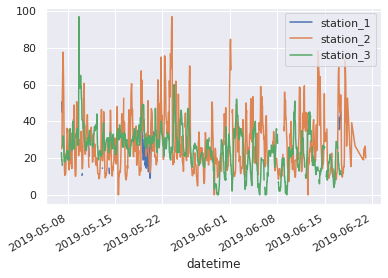

In [19]:
#Función plot - imprimir los datos de estaciones
aq.plot()
plt.show()

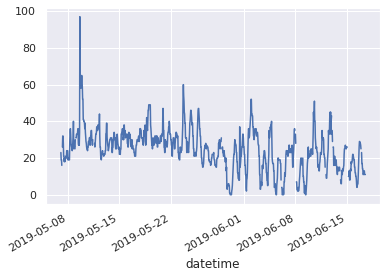

In [20]:
#Plotear una sola estación
aq["station_3"].plot()
plt.show()

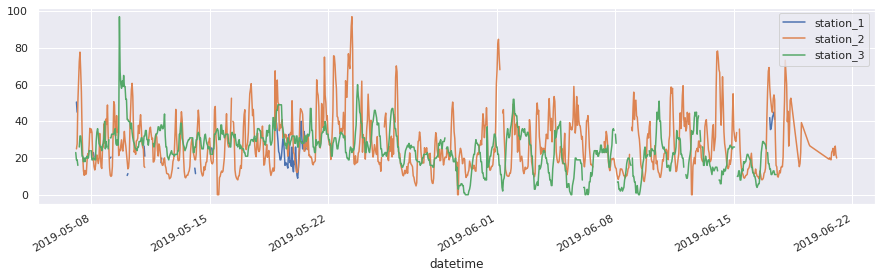

In [21]:
#Cambiar el tamaño del gráfico
fix, ax = plt.subplots(figsize =(15,4))
aq.plot(ax = ax)
plt.show()

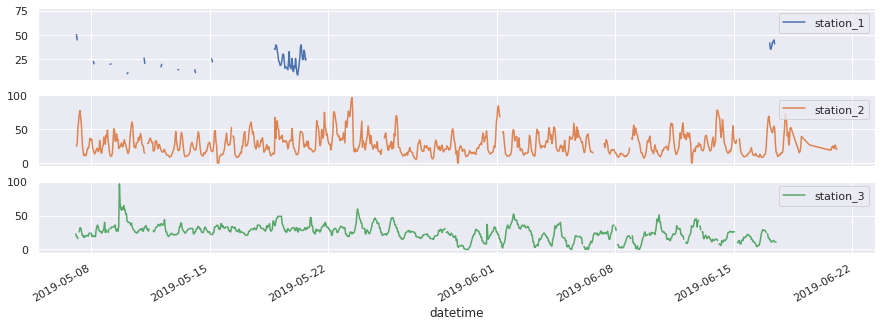

In [22]:
#Imprimir cada una de las columnas en graficós aparte 
grl = aq.plot(figsize=(15,5), subplots = True)
plt.show()

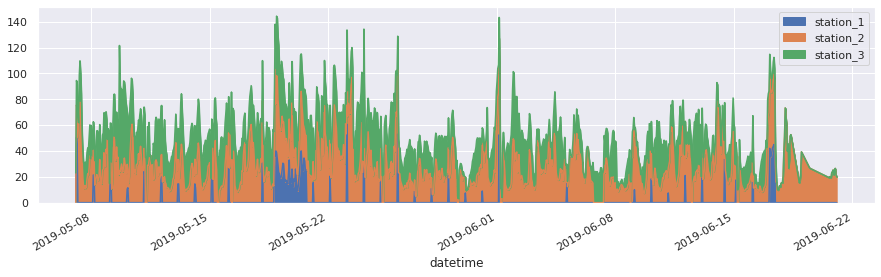

In [23]:
#Cambiar el tamaño y tipo de gráfico 
fix, ax = plt.subplots(figsize = (15,4))
aq.plot.area(ax = ax)
plt.show()

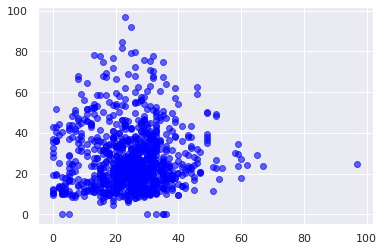

In [24]:
#Plotear un digrama de puntos
plt.scatter(aq["station_3"],aq["station_2"], alpha = 0.6, color="blue")
plt.show()

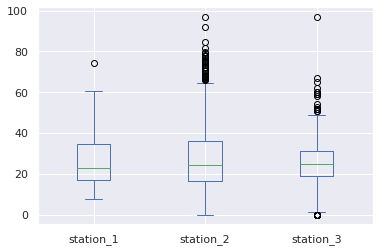

In [25]:
#Construir un diagrama de cajas o boxplot
aq.plot.box()
plt.show()

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****BIBLIOGRAFÍA****<tfont>

[1] Pandas TimeStamp https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

[2] Tutorial Time Series https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

[3] EDA Time Series https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda

[4] Metodo de Interpolación en Pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

[5] Trabajando con NaN en Pandas https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
